#Introduction

In this coursework, the class were assigned the Ames Housing Dataset, for which pupils had to perform exploratory analysis on. This dataset was originally assembled as an end of semester regression modelling project by the class instructor, Mr Dean De Cock, as he felt that the Boston Housing Dataset had become outdated. The Ames housing dataset consists of data for property sales that had occured in Ames between 2006-2010. 

The assigned dataset consists of 80 variables with a mix of nominal, ordinal, discrete, and continuous variables. 

In [1]:
# The code here mounts the google drive so that files can be accessed with further code later on.
# The current working directory is now the google drive

from google.colab import drive
drive.mount('/content/drive')
% ls
% cd drive/
% ls
% cd My\ Drive
% ls

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).
drive/  sample_data/
/content/drive
MyDrive/
/content/drive/My Drive
'Colab Notebooks'/   data/


In [2]:
# Importing the relevant packages with the conventional shorthand used to refer to the packages. 
# Pandas is a package that makes it easy to work with data in tabular form i.e. data in dataframes.
# Numpy is a scientific computing library that is used for working with arrays. Numpy arrays are faster and more efficient to use than lists. 
# Matplotlib is a popular visualisation library which allows the creation of graphs that are also highly customisable. 
# Pyplot is the scripting layer of matplotlib which is not as syntactically heavy as the Artist layer. 
# Seaborn is based on matplotlib and allows easier creation of plots such as heatplots. 
# The %matplotlib inline backend allows plots to be embedded in the notebook; directly below the cell of coding which produced the plot.

import pandas as pd
import numpy as np
import matplotlib as mpl
import matplotlib.pyplot as plt
%matplotlib inline                
import seaborn as sns

#Importing Data

The dataset was given in the form of a text file, that was saved on Google Drive. The text file of the data was read into a pandas dataframe.

In [3]:
# The pandas function read_csv reads csv files into a dataframe, but also can read txt files into a dataframe too. 
# The delimiter for csv files is a comma, but as this is a text file that is being read, the delimiter has to be specified as a tab
# The head() method display the first five rows of the dataframe.  
                                                                                      
df = pd.read_csv('data/9148720.txt', delimiter = '\t') 
df.head()                                             

,Order,PID,MS SubClass,MS Zoning,Lot Frontage,Lot Area,Street,Alley,Lot Shape,Land Contour,...,Pool Area,Pool QC,Fence,Misc Feature,Misc Val,Mo Sold,Yr Sold,Sale Type,Sale Condition,SalePrice
0,1,526301100,20,RL,141.0,31770,Pave,NaN,IR1,Lvl,...,0,NaN,NaN,NaN,0,5,2010,WD,Normal,215000
1,2,526350040,20,RH,80.0,11622,Pave,NaN,Reg,Lvl,...,0,NaN,MnPrv,NaN,0,6,2010,WD,Normal,105000
2,3,526351010,20,RL,81.0,14267,Pave,NaN,IR1,Lvl,...,0,NaN,NaN,Gar2,12500,6,2010,WD,Normal,172000
3,4,526353030,20,RL,93.0,11160,Pave,NaN,Reg,Lvl,...,0,NaN,NaN,NaN,0,4,2010,WD,Normal,244000
4,5,527105010,60,RL,74.0,13830,Pave,NaN,IR1,Lvl,...,0,NaN,MnPrv,NaN,0,3,2010,WD,Normal,189900


The initial observation from the resulting dataframe is the amount of missing values for the variables 'Alley', 'Pool QC', 'Fence', and 'Misc Feature'.
These missing values will be explored further and be rectified in the data cleaning stage. Columns with missing data raises suspicion that there are other variables with missing data. 

Also, given the 'Order' variable is just an observation number, this variable wll not be useful for regression modelling, but the variable will be kept for now. 

In [4]:
# The shape attribute returns a tuple which specifies the number of rows and columns in the dataset. 

print('Shape of dataframe:', df.shape)

Shape of dataframe: (2930, 82)


In [5]:
# The dtype attribute returns the datatype of each column. The object attribute denotes categorical data.

df.dtypes

Order               int64
PID                 int64
MS SubClass         int64
MS Zoning          object
Lot Frontage      float64
                   ...   
Mo Sold             int64
Yr Sold             int64
Sale Type          object
Sale Condition     object
SalePrice           int64
Length: 82, dtype: object

In [6]:
# The pandas info method for a dataframe returns a concise summary of the dataframe variables.

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2930 entries, 0 to 2929
Data columns (total 82 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Order            2930 non-null   int64  
 1   PID              2930 non-null   int64  
 2   MS SubClass      2930 non-null   int64  
 3   MS Zoning        2930 non-null   object 
 4   Lot Frontage     2440 non-null   float64
 5   Lot Area         2930 non-null   int64  
 6   Street           2930 non-null   object 
 7   Alley            198 non-null    object 
 8   Lot Shape        2930 non-null   object 
 9   Land Contour     2930 non-null   object 
 10  Utilities        2930 non-null   object 
 11  Lot Config       2930 non-null   object 
 12  Land Slope       2930 non-null   object 
 13  Neighborhood     2930 non-null   object 
 14  Condition 1      2930 non-null   object 
 15  Condition 2      2930 non-null   object 
 16  Bldg Type        2930 non-null   object 
 17  House Style   

'Alley', 'Fireplace Qu', 'Pool Q', 'Fence' and 'Misc Feature' have an alarmingly large amount of missing data. Looking at the the summary of the dataframe above, it confirms the suspicions from earlier on in regards to the dataframe missing lots of data. 

**Descriptive Statistics**

In [7]:
# The describe method returns summary statistics for numerical variables in the dataframe.

df.describe()

,Order,PID,MS SubClass,Lot Frontage,Lot Area,Overall Qual,Overall Cond,Year Built,Year Remod/Add,Mas Vnr Area,...,Wood Deck SF,Open Porch SF,Enclosed Porch,3Ssn Porch,Screen Porch,Pool Area,Misc Val,Mo Sold,Yr Sold,SalePrice
count,2930.00000,2.930000e+03,2930.000000,2440.000000,2930.000000,2930.000000,2930.000000,2930.000000,2930.000000,2907.000000,...,2930.000000,2930.000000,2930.000000,2930.000000,2930.000000,2930.000000,2930.000000,2930.000000,2930.000000,2930.000000
mean,1465.50000,7.144645e+08,57.387372,69.224590,10147.921843,6.094881,5.563140,1971.356314,1984.266553,101.896801,...,93.751877,47.533447,23.011604,2.592491,16.002048,2.243345,50.635154,6.216041,2007.790444,180796.060068
std,845.96247,1.887308e+08,42.638025,23.365335,7880.017759,1.411026,1.111537,30.245361,20.860286,179.112611,...,126.361562,67.483400,64.139059,25.141331,56.087370,35.597181,566.344288,2.714492,1.316613,79886.692357
min,1.00000,5.263011e+08,20.000000,21.000000,1300.000000,1.000000,1.000000,1872.000000,1950.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,2006.000000,12789.000000
25%,733.25000,5.284770e+08,20.000000,58.000000,7440.250000,5.000000,5.000000,1954.000000,1965.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,4.000000,2007.000000,129500.000000
50%,1465.50000,5.354536e+08,50.000000,68.000000,9436.500000,6.000000,5.000000,1973.000000,1993.000000,0.000000,...,0.000000,27.000000,0.000000,0.000000,0.000000,0.000000,0.000000,6.000000,2008.000000,160000.000000
75%,2197.75000,9.071811e+08,70.000000,80.000000,11555.250000,7.000000,6.000000,2001.000000,2004.000000,164.000000,...,168.000000,70.000000,0.000000,0.000000,0.000000,0.000000,0.000000,8.000000,2009.000000,213500.000000
max,2930.00000,1.007100e+09,190.000000,313.000000,215245.000000,10.000000,9.000000,2010.000000,2010.000000,1600.000000,...,1424.000000,742.000000,1012.000000,508.000000,576.000000,800.000000,17000.000000,12.000000,2010.000000,755000.000000


The summary statistics here provide a five figure summary for all the numerical variables. A lot of the columns have values of 0 for the summary statistics which points to a lack of variance in the values for some of the variables.  

# Exploratory Data Analysis (EDA) 

**Distributions of Numerical Variables**

The code below plots the distributions for every numerical variable in the dataframe. In comparison to the descriptive statistics obtained previously, plots of the distributions provide more clearer insight into the variables. 

Plotting the distributions of the numerical variables will allow one to identify outliers in data, visualise the distributions that each of the variables follow, spot skewness of distributions, and help spot anything unusual in any of the distributions.


array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7f26f96b4550>,
      dtype=object)

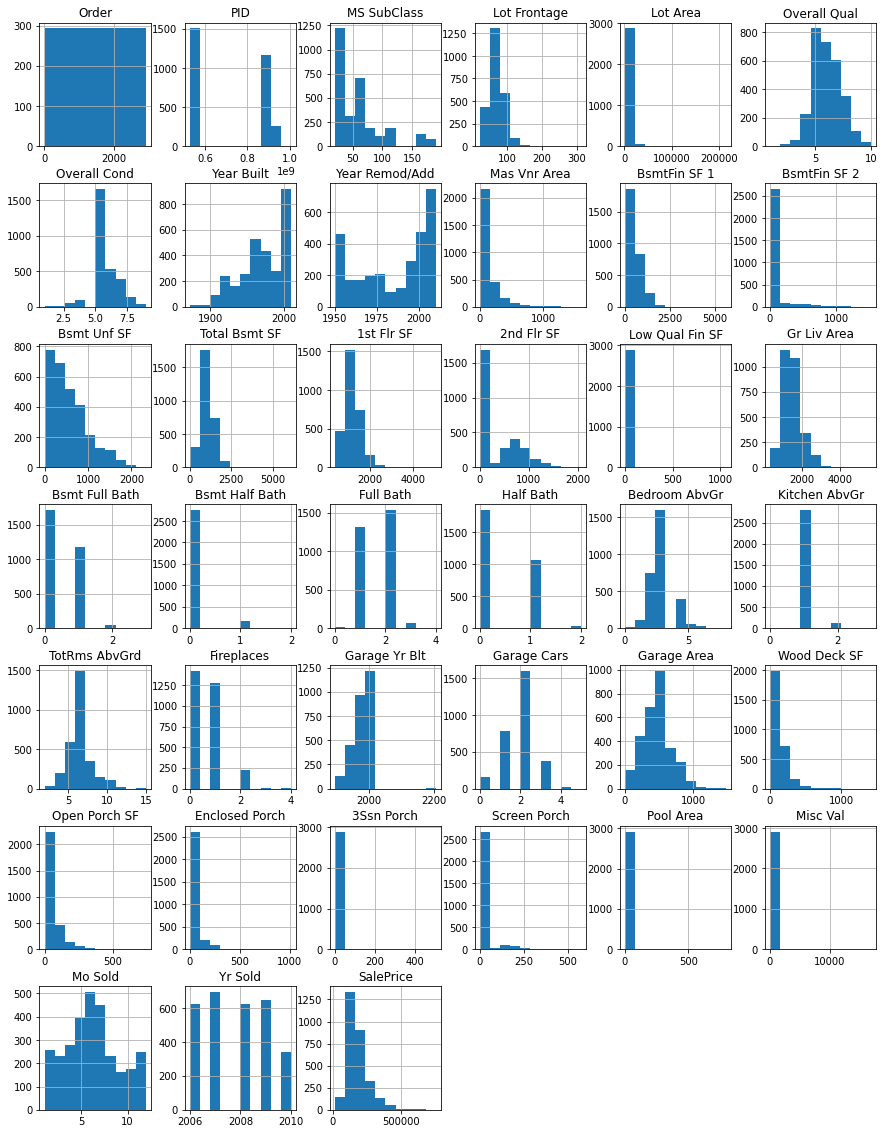

In [8]:
df.hist(figsize=(15,20))

Some observations from the distributions:

*   The distribution for the 'Order' variable is flat and wide. 
*   Distributions related to porch including the variable 'Open Porch SF' have large majority values
*   There exists outliers in a few of the distributions. The 'Garage Yr Blt' variable has an outlier that is very prominent and is most definitely a mistake.
*   Multiple distributions are skewed to the right including the target variable 'SalePrice'. 

Variables when visualised that are flat and wide are of little use in data mining. The goal of data modelling is to find patterns from data; however, no such patterns can exist for variables which follow this type of distribution. The 'Order' variable will now be dropped as from the outset, it was likely going to be a redundant variable for modelling.

There are many solutions to dealing with outliers in a dataset. Firstly, more data can be collected to reflect this aspect of the data better, but where this is not possible, the outliers can be ammended or removed. Outliers are usually ammended only in instances where the data value is an error, otherwise they are more commonly removed. 

In [9]:
# The drop method removes the Order column in the dataframe
# axis = 1 specifies to drop the label from the columns of the dataframe
# inplace ammends the original dataframe df without returning a new dataframe result. 

df.drop("Order", axis = 1, inplace = True)

**Correlation**

A correlation value between two variables can range from -1 to 1. A value of 1 indicates a strong positive correlation (positivie linear association) between variables, and -1 indicated a strong negative correlation (negative linear association).

A great way to visualise pairwise correlations is to use a correlation heatmap. The correlation heatmap allows one to discover which numerical variables have the strongest correlation with the target variable ('SalePrice'); having independent variables that are correlated with the dependent variable ('SalePrice') is one of the assumptions of a regression model. 

Another important assumption in regression modelling is that there should be no major multicollinearity between the explanatory variables. This assumption can also be checked through the correlation heatmap.

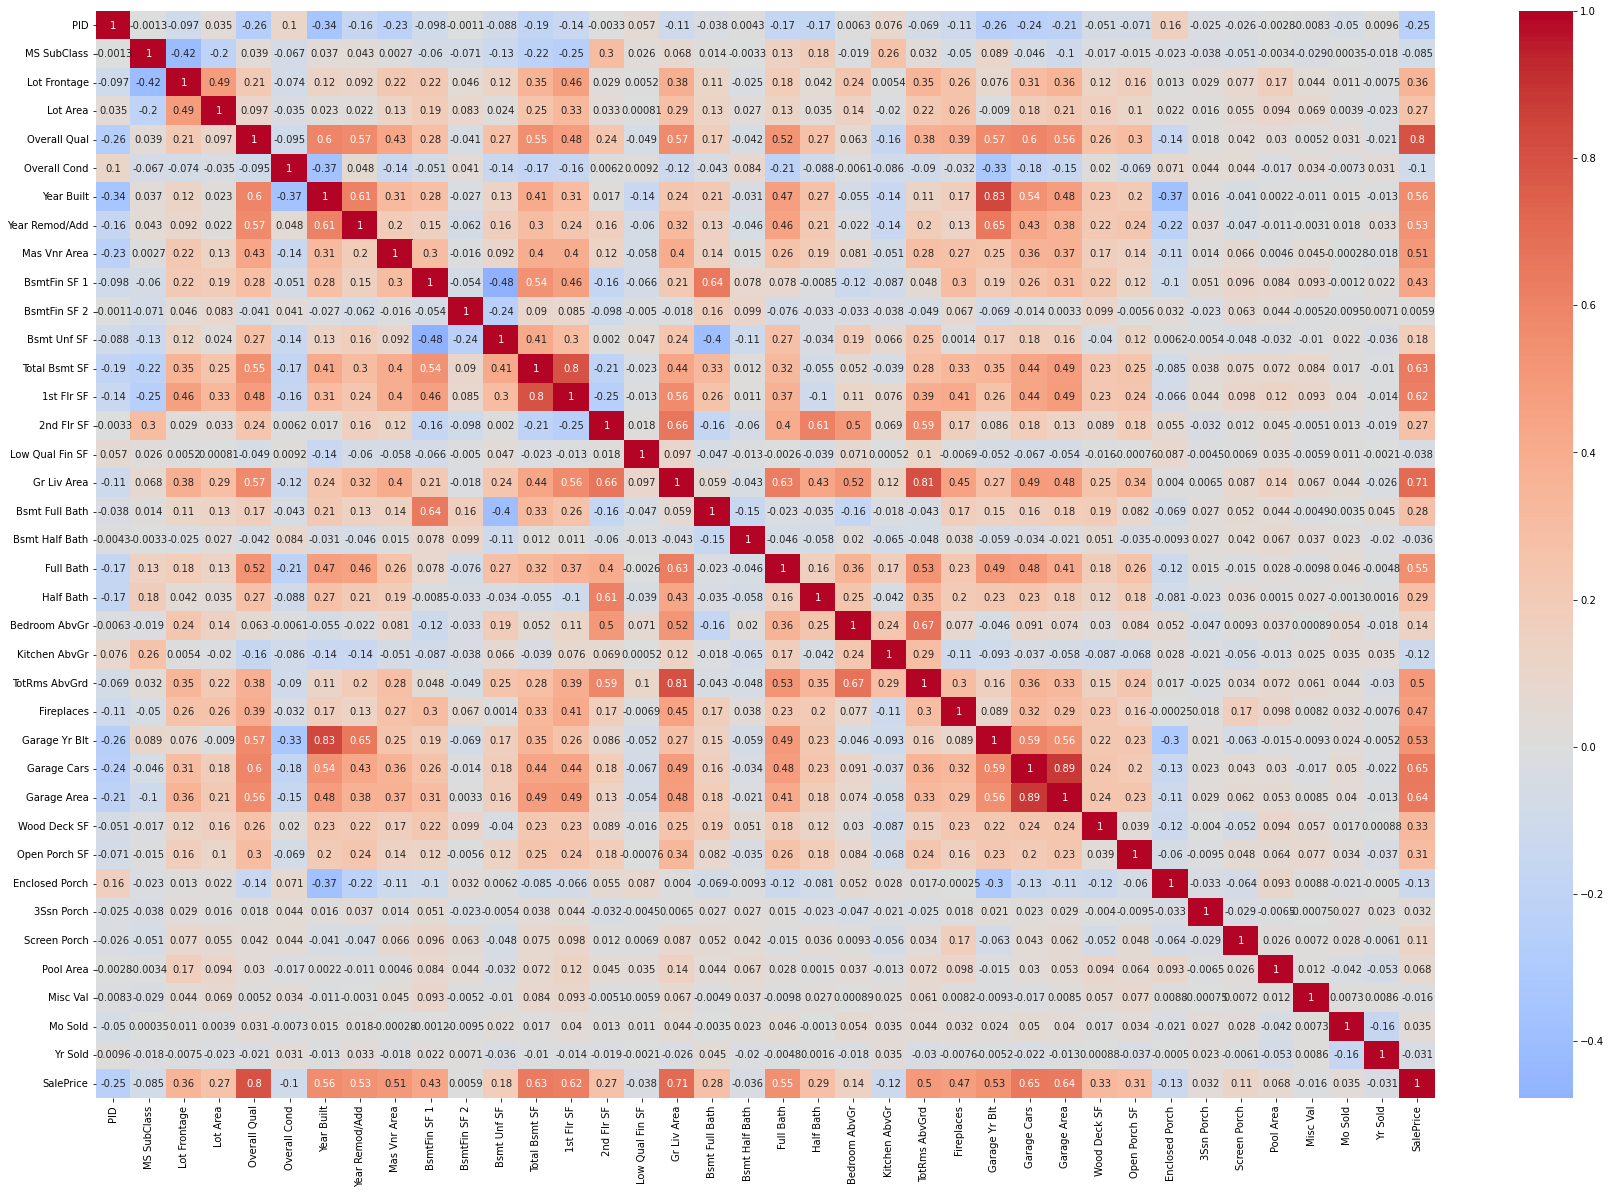

In [10]:
# The package seaborn is used to form the colour coded heatmap from the df.corr() dataframe
# The annot argument when set to True displays the correlation values on the heatmap
# cmap chooses the range of colours selected for the heatmap
# center will select the value on which to center the colour map, changing this value will change the colours 

# https://stackoverflow.com/questions/69913739/seaborn-heatmap-correlation-wont-fit-annotation-digits

plt.figure(figsize=(30, 20))
sns.heatmap(df.corr(),annot=True, cmap='coolwarm', center=0)

From the resulting correlation heatmap it can be seen that the variables 'Observation Qual' , 'Gr Liv Area' , and 'Garage Cars' have a strong positive correlation with the target variable 'SalePrice'. There are also other variables present which are positively correlated with the target variable; however, negative correlations are more sparse. 

In terms of multicollinearity four pairs of independent variables are highly correlated, which could be problematic for regression modelling. 

Pairs of Correlated Independent Variables:
*   'Garage Area' and 'Garage Cars'
*   'Garage Yr Blt' and 'Year Built'
*   'TotRms AbvGrd' and 'Gr Liv Area'
*   '1st Flr SF' and 'Total Bsmt SF'

To deal with this problem , from each pair of variables, the variable with the least correlation with the target variable 'SalePrice' can be removed in the feature engineering stage of building a regression model.  

The independent variables with the highest correlations with the target variable can be viewed more concisely , in descending order , with the coding given below:

In [11]:
# The coding here selects the 'SalePrice' column from the correlation dataframe and then sorts the correlation values in the series in descending order.

df.corr()['SalePrice'].sort_values(ascending=False)

SalePrice          1.000000
Overall Qual       0.799262
Gr Liv Area        0.706780
Garage Cars        0.647877
Garage Area        0.640401
Total Bsmt SF      0.632280
1st Flr SF         0.621676
Year Built         0.558426
Full Bath          0.545604
Year Remod/Add     0.532974
Garage Yr Blt      0.526965
Mas Vnr Area       0.508285
TotRms AbvGrd      0.495474
Fireplaces         0.474558
BsmtFin SF 1       0.432914
Lot Frontage       0.357318
Wood Deck SF       0.327143
Open Porch SF      0.312951
Half Bath          0.285056
Bsmt Full Bath     0.276050
2nd Flr SF         0.269373
Lot Area           0.266549
Bsmt Unf SF        0.182855
Bedroom AbvGr      0.143913
Screen Porch       0.112151
Pool Area          0.068403
Mo Sold            0.035259
3Ssn Porch         0.032225
BsmtFin SF 2       0.005891
Misc Val          -0.015691
Yr Sold           -0.030569
Bsmt Half Bath    -0.035835
Low Qual Fin SF   -0.037660
MS SubClass       -0.085092
Overall Cond      -0.101697
Kitchen AbvGr     -0

Seaborn's regression plot function effortlessly creates an aesthetically pleasing scatter plot with a linear regression model fit. This will allow one to inspect more closely some of the correlations that exist with the target variable. The two independent variables that had the highest correlation with 'SalePrice' will be examined below. 

(0.0, 10.45)

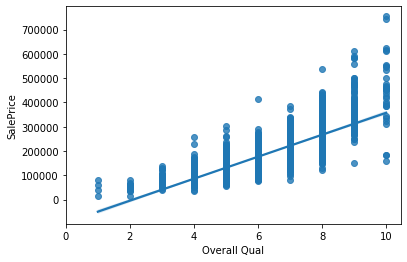

In [12]:
# x='Over Qual' and y='SalePrice' are the variables to be plotted.
# data = df makes reference to the dataframe.
# plt.xlim(0,) specifies the x limits that are visible in the plot.

sns.regplot(x="Overall Qual", y="SalePrice", data=df)
plt.xlim(0,)

From the regression plot it can be seen that as 'Overall Qual' increases then 'SalePrice' increases. A strong positive correlation is visible from the plot. Moreover, the variance for the 'SalePrice' increases as the 'Overall Qual' value increases. Elaborating on this, for an 'Overall Qual' value of 10 the 'SalePrice' ranges from approximately 150,000 to 750,000. Whereas for an 'Overall Qual' score of 1 the 'SalePrice' has a range of 100,000.

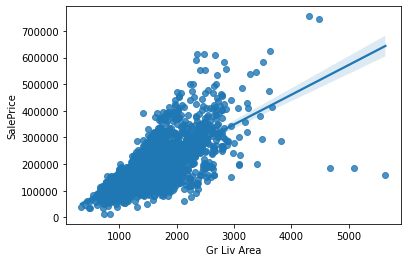

In [13]:
sns.regplot(x="Gr Liv Area", y="SalePrice", data=df)

Again, the strong positive correlation between 'Gr Liv Area' and 'SalePrice' is visible. Nevertheless, what really catches the attention are three outliers in the plot. Linear regression models can be sensitive to outliers; therefore, these outliers will be handled in the data cleaning section before aspiring to make an accurate regression model. 

**Hypothesis Testing**

Performing a hypothesis test allows one to determine the certainty of  correlation between two variables. In this subsection the two independent variables ('Overall Qual' and 'Gr Liv Area') which had the highest correlation with 'SalePrice' will be the subject of statistical hypothesis testing.

The null hypothesis, alternative hypothesis, and significance level are given below:

H*o*: Correlation coefficient is equal to 0 

H*a*: Correlation coefficient is not equal to 0

Significance Level (alpha) = 0.05

In [14]:
# the pearsonr function from the scipy.stats module computes the pearson correlation and the p-value for the two specified variables.
# The result is returned as a tuple 
# The print function takes in parameters and prints them out

from scipy import stats
pearson_coef, p_value = stats.pearsonr(df['Overall Qual'], df['SalePrice'])
print('pearson correlation:', pearson_coef)
print('p-value:', p_value)

pearson correlation: 0.7992617947690233
p-value: 0.0


As the p-value = 0 < 0.05 , the null hypothesis is rejected and it can be concluded that the correlation value is statistically significant.Therefore, there is a linear relationship between the variables at the popultion level between 'Overall Qual' and 'SalePrice'.

In [15]:
pearson_coef, p_value = stats.pearsonr(df['Gr Liv Area'], df['SalePrice'])
print('pearson correlation:', pearson_coef)
print('p-value:', p_value)

pearson correlation: 0.7067799209766279
p-value: 0.0


Again as the p-value = 0 < 0.05 , the null hypothesis is rejected and it can be concluded that the correlation value is statistically significant.Therefore, there is a linear relationship between the variables at the popultion level between 'Gr Liv Area' and 'SalePrice'.

**Categorical Variables vs Target Variable ('SalePrice')**

In this section of the report, investigation of the association between categorical variables and 'SalePrice' will be scrutinised. Intuitively categorical variables which may have a relationship with 'SalePrice' could include 'Neighborhood' and 'Exter Qual', so these variables will be visualised against the dependent variable. 

***Boxplot of 'Neighborhood' vs 'SalePrice'***

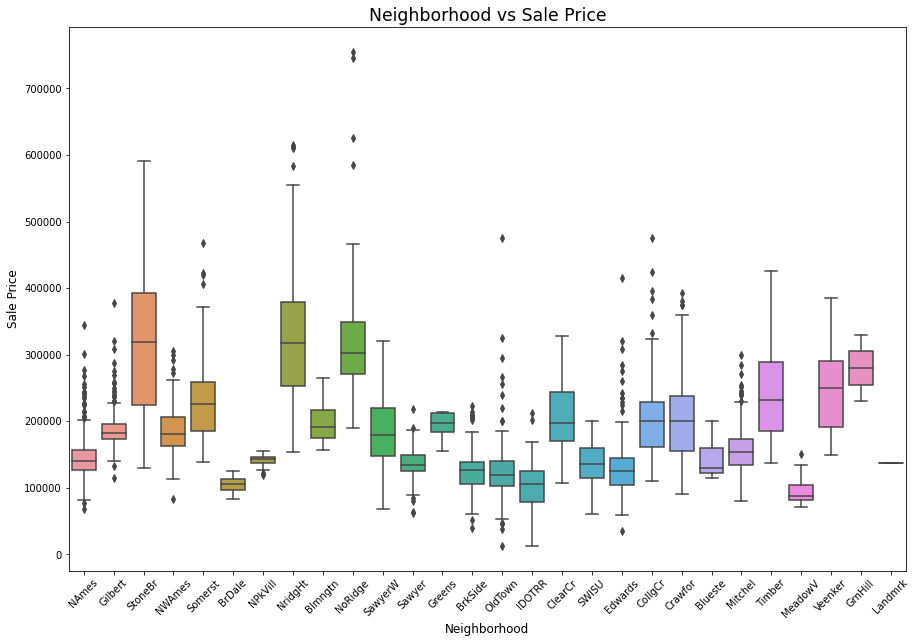

In [16]:
# plt.figure(figsize=(15, 10)) returns a figure with dimensions of 15 inches by 10 inches. 
# The seaborn boxplot function parameters include the variables that have to be plotted on each axis, and the dataframe. 
# plt.xticks(rotation=45) will rotate the ticks on the x axis by 45 degrees. 
# plt.xlabel() and plt.ylabel() label the x-axis and y-axis
# plt.title() adds a heading to the figure.

plt.figure(figsize=(15, 10))
sns.boxplot(x="Neighborhood", y="SalePrice", data=df)
plt.xticks(rotation=45)
plt.xlabel('Neighborhood',fontsize='large')
plt.ylabel('Sale Price',fontsize='large')
plt.title('Neighborhood vs Sale Price',fontsize='xx-large')
plt.show()

The assumption that 'Neighborhood' influences 'SalePrice' looks accurate from looking at the resulting plot. 
Comparing the boxplots, the neighborhoods have differing median sale 
prices. Neighborhoods like *Gilbert* and *NridgHt* have higher median sale prices than every other neighborhood, but they also have a very large spread.  



***Groupby Function***

Grouping by 'Neighborhood' and then calculating the median 'SalePrice' clearly ecapsulates that median 'SalePrice' differs by 'Neighborhood'. 

In [17]:
# The groupby method will split the dataframe for each 'Neighborhood' label, apply the median calculation for each individual group, and then combine the results. 

df.groupby(by=["Neighborhood"])['SalePrice'].median()

Neighborhood
Blmngtn    191500.0
Blueste    130500.0
BrDale     106000.0
BrkSide    126750.0
ClearCr    197500.0
CollgCr    200000.0
Crawfor    200624.0
Edwards    125000.0
Gilbert    183000.0
Greens     198000.0
GrnHill    280000.0
IDOTRR     106500.0
Landmrk    137000.0
MeadowV     88250.0
Mitchel    153500.0
NAmes      140000.0
NPkVill    143750.0
NWAmes     181000.0
NoRidge    302000.0
NridgHt    317750.0
OldTown    119900.0
SWISU      136200.0
Sawyer     135000.0
SawyerW    180000.0
Somerst    225500.0
StoneBr    319000.0
Timber     232106.5
Veenker    250250.0
Name: SalePrice, dtype: float64

The median 'SalePrice' by Neighborhood ranges all the way from 88250 (for *MeadowV*) to 319000 (for *StoneBr*), which is further evidence of the association between 'Neighborhood' and 'SalePrice'.

***Boxplot of 'External Qual' vs 'SalePrice'***

Now the variables 'Exter Qual' and 'SalePrice' will be plotted against each other. 

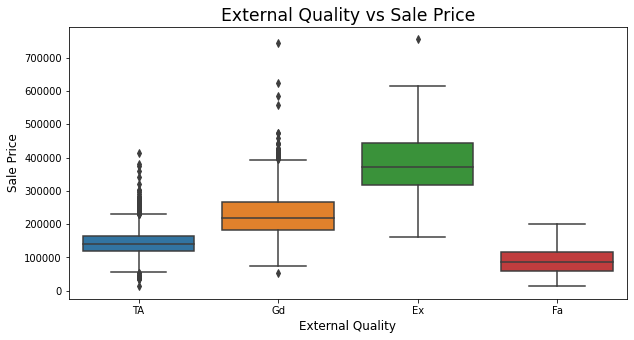

In [18]:
plt.figure(figsize=(10, 5))
sns.boxplot(x="Exter Qual", y="SalePrice", data=df)
plt.xlabel('External Quality',fontsize='large')
plt.ylabel('Sale Price',fontsize='large')
plt.title('External Quality vs Sale Price',fontsize='xx-large')
plt.show()

Given below are the ordinal labels for 'External Qual' obtained from the data dictionary: 
*   Ex - Excellent
*   Gd - Good
*   TA - Average
*   Fa - Fair

From viewing the boxplot, the median 'SalePrice' noticably differs for each 'External Quality' label on the x axis. Also, the spread for all four categories is quite similar, as seen by the size of the boxes for each boxplot. 

**Note:** The size of the box in a boxplot portrays the inter quartile range (IQR). IQR is a measure of the spread of the data points, and this metric is usually a better measure of spread than the range as it is robust to outliers. 



**Inspection of Target Variable**

Previously, near the start of the notebook distributions for all numerical variables, including the target variable, were plotted. However, the distribution of the target variable ('SalePrice') can be investigated more thoroughly through a larger histogram that has more bins.

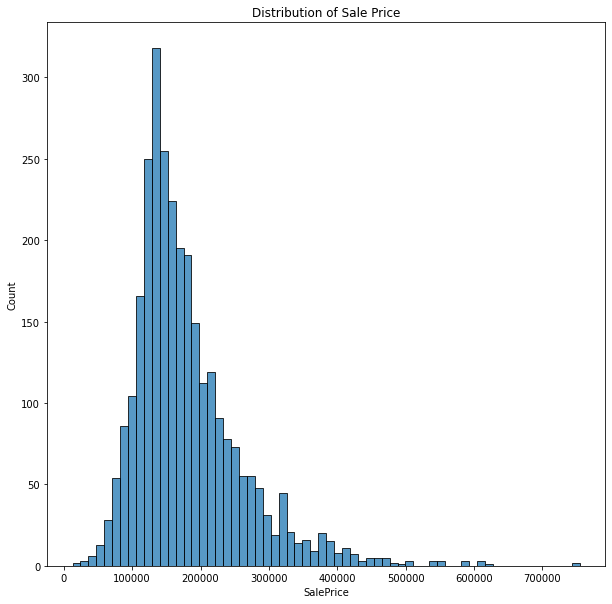

In [19]:
plt.figure(figsize=(10,10))
sns.histplot(df['SalePrice'])
plt.title('Distribution of Sale Price')
plt.show()

In [20]:
# Code obtains the max value of the 'SalePrice' column

df['SalePrice'].max()

755000

From the plot it can be seen that the distribution of 'SalePrice' has a right skew. Moreover, there is an extreme outlier above at the 755000 price mark. Although having the target variable normally distributed is not one of the assumptions of a linear regression model, it could still be beneficial to apply a log transformation to this data to achieve a normal distribution. 

*Three assumptions which do hold for linear regression modelling include:*


*   The prospect of a linear relationship should exist between the independent variables and dependent variable.
*   Errors should be normally distributed with mean of 0 and constant variance
*   There should not be a strong correlation between any of the input variables.

#Data Cleaning

**Outliers**

In the Ames housing dataset documentation it is outlined that when 'SalePrice' is plotted against 'Gr Liv Area' three true outliers exist. These outliers were also spotted previously in the exploratory analysis.

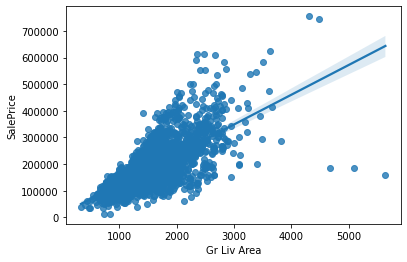

In [21]:
sns.regplot(x='Gr Liv Area',y='SalePrice',data=df)

It can be seen clearly from the plot that the three outliers are near the bottom right of the figure. It would be beneficial in removing these outliers because they can impact the quality of the regression model, especially when fitting a model through the Ordinary Least Squares method. 

Another alternative to removing outliers could be to deploy a median regression model,which is more robust to distortions in data, but in this specific case the removal procedure will be carried out. 

In [22]:
# df[(df['Gr Liv Area']>=4000) & (df['SalePrice']<=200000)] will return the rows of the dataframe that satidfied the conditions of the query
# df[(df['Gr Liv Area']>=4000) & (df['SalePrice']<=200000)].index will return index labels that satisfy the conditions of the query.
# The drop method being applied to the dataframe will remove rows for the selected index labels.
# axis = 0 will specifiy to drop the rows from the index
# inplace=True performs the operation inplace

df.drop(df[(df['Gr Liv Area']>=4000) & (df['SalePrice']<=200000)].index, axis=0, inplace=True)

***'Garage Yr Blt' Outlier***

When viewing the distributions for all numeric variables earlier, the variable 'Garage Yr Blt' was found to have an outlier as well. This outlier will now be corrected too. For this outlier, the year the Garage was built will be replaced by the year the house was built, as this would be the most logical amendment. 

In [23]:
# The max method returns the maximum value in the 'Garage Yr Blt' column. 

df['Garage Yr Blt'].max()

2207.0

In [24]:
# df[df['Garage Yr Blt']==2207] returns the row which consists of the maximum value for the variable 'Garage Yr Blt'
# Then the 'Year Built' column is selected to obtain the year the house was built.

df[df['Garage Yr Blt']==2207]['Year Built']

2260    2006
Name: Year Built, dtype: int64

In [25]:
# The replace method is used to replace the outlier value, with the old value and new value given in a dictionary format

df['Garage Yr Blt'].replace({2207:2006},inplace = True)

**Examining Null Values**

There is no easy way to handle non-numeric variables. A useful method can be to perform a count of the values in each variable and then visualise the counts as a bar chart for each variable.  

MS Zoning


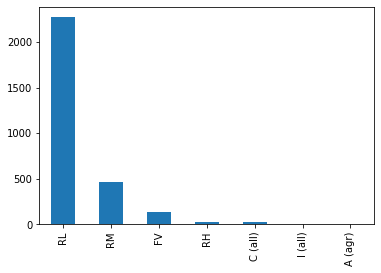

Street


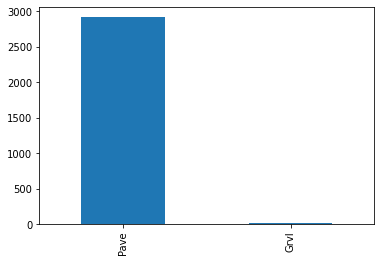

Alley


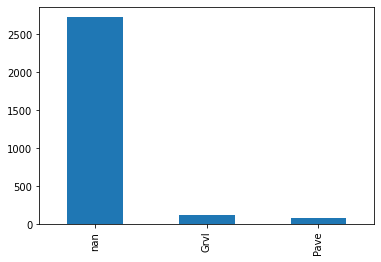

Lot Shape


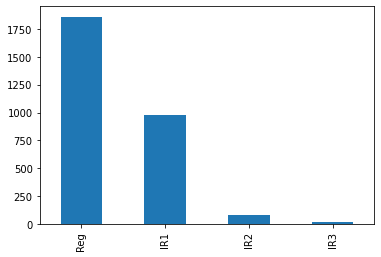

Land Contour


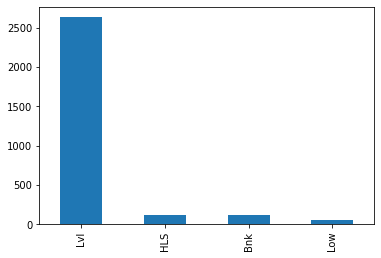

Utilities


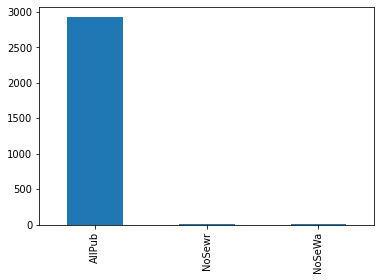

Lot Config


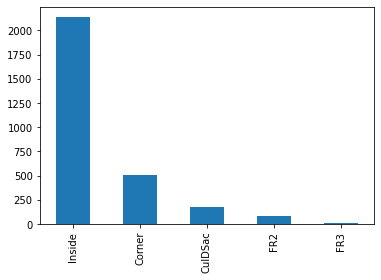

Land Slope


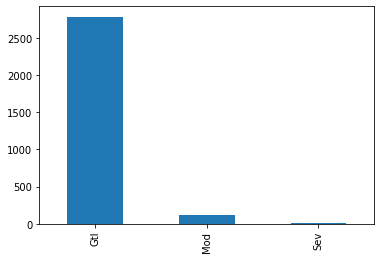

Neighborhood


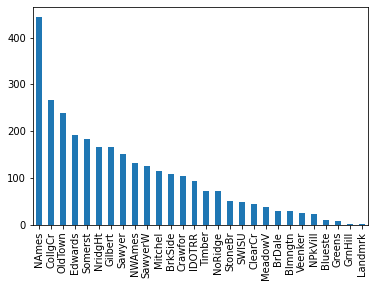

Condition 1


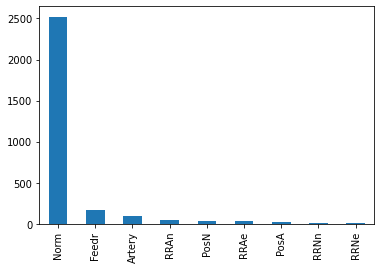

Condition 2


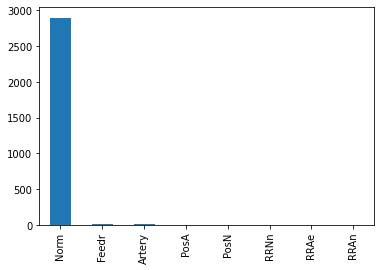

Bldg Type


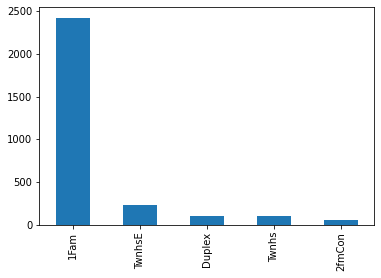

House Style


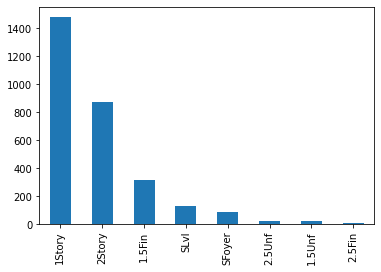

Roof Style


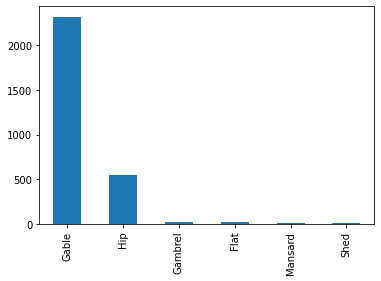

Roof Matl


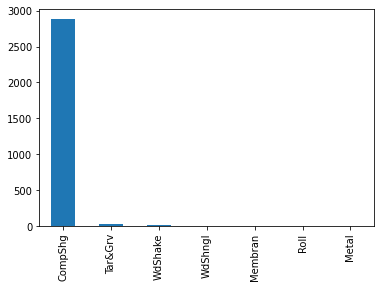

Exterior 1st


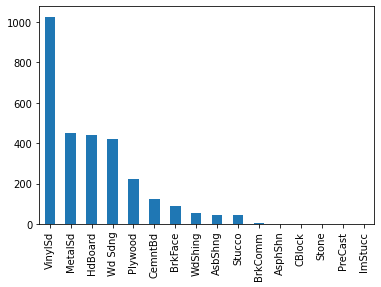

Exterior 2nd


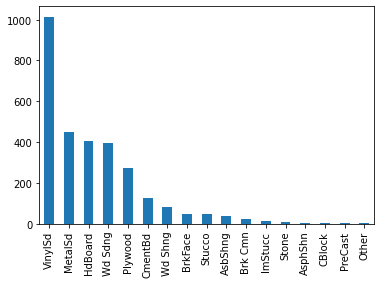

Mas Vnr Type


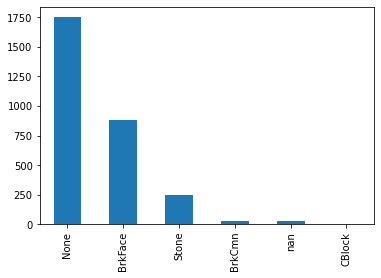

Exter Qual


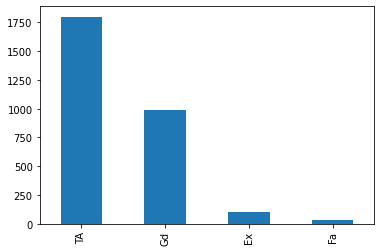

Exter Cond


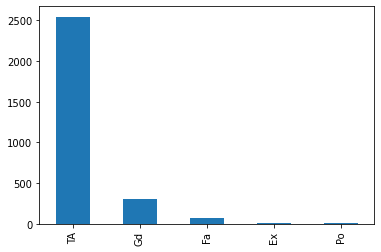

Foundation


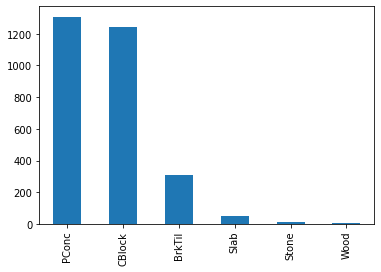

Bsmt Qual


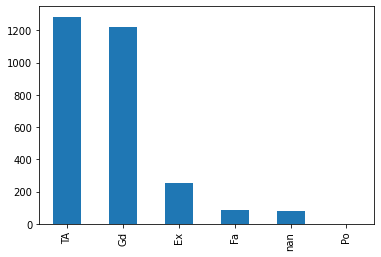

Bsmt Cond


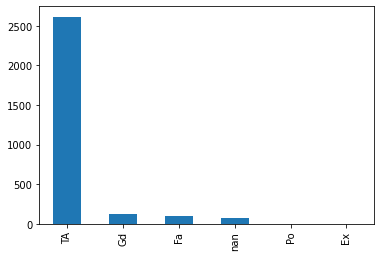

Bsmt Exposure


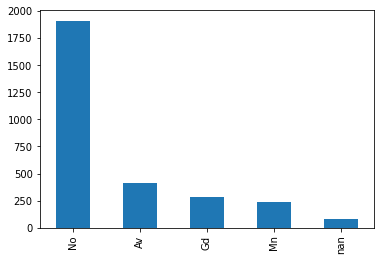

BsmtFin Type 1


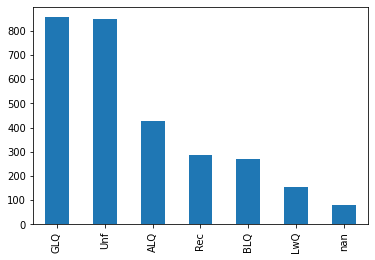

BsmtFin Type 2


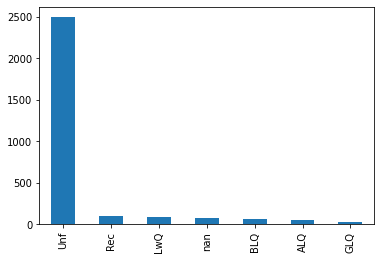

Heating


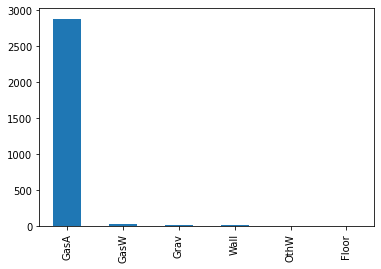

Heating QC


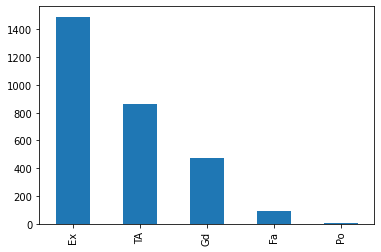

Central Air


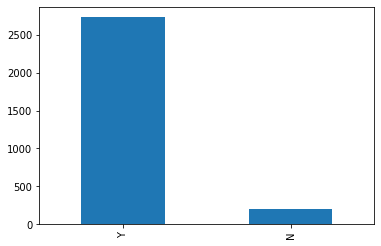

Electrical


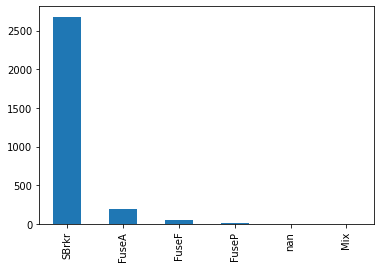

Kitchen Qual


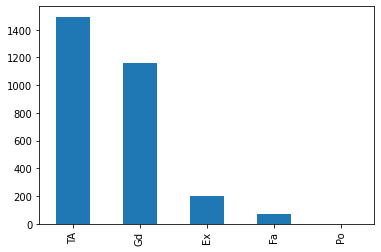

Functional


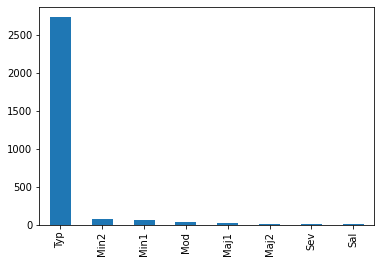

Fireplace Qu


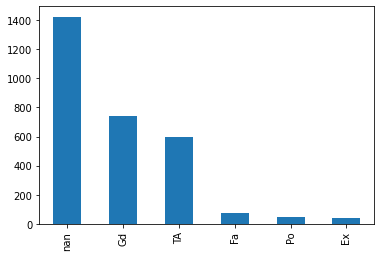

Garage Type


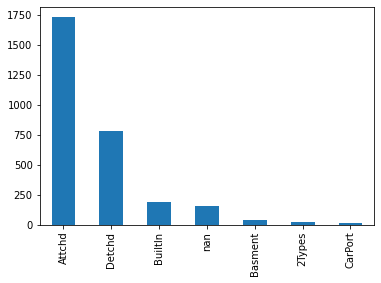

Garage Finish


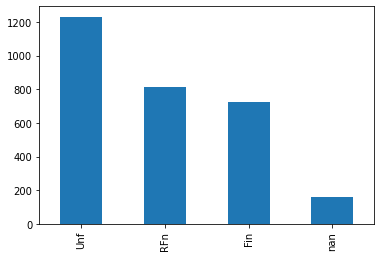

Garage Qual


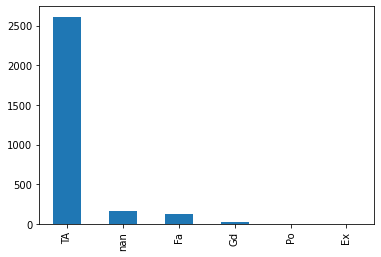

Garage Cond


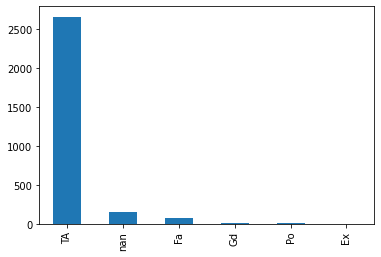

Paved Drive


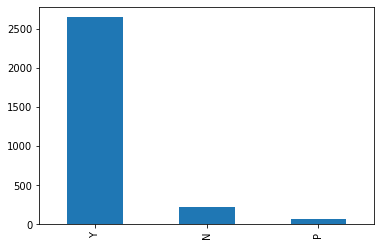

Pool QC


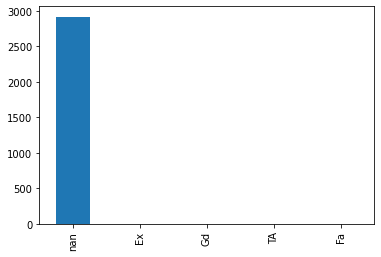

Fence


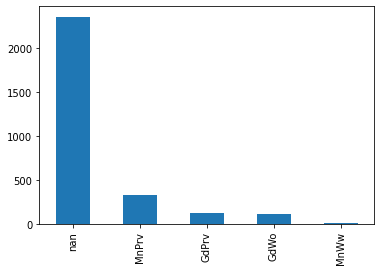

Misc Feature


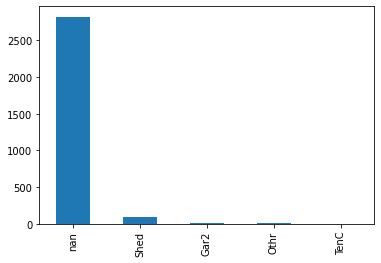

Sale Type


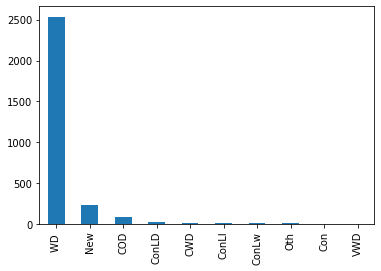

Sale Condition


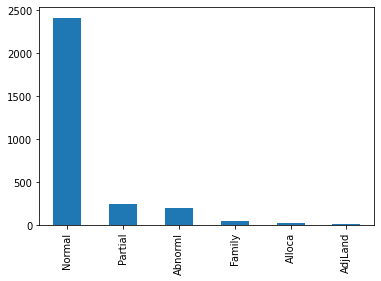

In [26]:
# The for loop repeats the following steps for each column of type "object"
# print(col) will print the name of the column
# df[col].value_counts() gives us a pandas "series" which shows the count of each value appearing in the column
# series has a plot function that can be used to create a plot of the values in the series. 

import matplotlib.pyplot as plt

for col in df.select_dtypes(include=object).columns: 
    print(col)
    df[col].value_counts(dropna=False).plot(kind='bar')
    plt.show()

Observations:

*   For almost every categorical variable, there exists a large majority value.
*   Many variables have their most common value count as NaN, which is used to represent missing data.
*   Interestingly, for 'Mas Vnr Type' the datatype NaN and None are both used to represent missing data. 



***Sorted Null Values***

By focussing on only the variables that have null values it will allow for focused, effortless and precise cleaning of the dataframe.


In [27]:
# df.isnull() will return a mask of bool values for each element in the dataframe. True is returned for locations where there is missing data and False for non missing data.
# df.isnull().sum() will sum all the True values for each column to return a series indicating the missing values for each variable.
# sort_values(ascending = False) sorts the missing data to be in descending order.
# Finally, missingdata[missingdata>0] will display all variables that have missing data only

missingdata = df.isnull().sum().sort_values(ascending = False)
missingdata[missingdata>0]

Pool QC           2915
Misc Feature      2822
Alley             2729
Fence             2355
Fireplace Qu      1422
Lot Frontage       490
Garage Cond        159
Garage Finish      159
Garage Yr Blt      159
Garage Qual        159
Garage Type        157
Bsmt Exposure       83
BsmtFin Type 2      81
Bsmt Qual           80
Bsmt Cond           80
BsmtFin Type 1      80
Mas Vnr Area        23
Mas Vnr Type        23
Bsmt Half Bath       2
Bsmt Full Bath       2
BsmtFin SF 1         1
Garage Cars          1
Electrical           1
Total Bsmt SF        1
Bsmt Unf SF          1
BsmtFin SF 2         1
Garage Area          1
dtype: int64

Alarmingly, on initial observation there are a lot of variables that have missing data. Some variables such as 'Pool QC' are almost solely made up of missing data. Although, when inspecting the Ames Housing Data Documentation it was discovered that on multiple occasions the null values for an ordinal feature just indicated poor performance. By converting these features to an integer scale, the sense of order or rank in the ordinal variables is maintained and many of the null values for the ordinal variables will be addressed too. Furthermore, having the data in numerical format is needed for many machine leanring algorithms including regression.

***Cleaning Null Values and Encoding Variables***

In [28]:
# First, one can deal with ordinal variables which do not have null values.
# The map() method is used for subsitutuing the labels in the series with values. 

df['Lot Shape']=df['Lot Shape'].map({'Reg':3,'IR1':2,'IR2':1,'IR3':0})
df['Utilities']=df['Utilities'].map({'AllPub':3,'NoSewr':2,'No SeWa':1,'ELO':0})
df['Land Slope']=df['Land Slope'].map({'Gtl':2,'Mod':1,'Sev':0})
df['Exter Qual']=df['Exter Qual'].map({'Ex':5,'Gd':4,'TA':3,'Fa':2,'Po':1})
df['Exter Cond']=df['Exter Cond'].map({'Ex':5,'Gd':4,'TA':3,'Fa':2,'Po':1})
df['Heating QC']=df['Heating QC'].map({'Ex':5,'Gd':4,'TA':3,'Fa':2,'Po':1})
df['Electrical']=df['Electrical'].map({'SBrkr':4,'FuseA':3,'FuseF':2,'FuseP':1,'Mix':0})
df['Kitchen Qual']=df['Kitchen Qual'].map({'Ex':5,'Gd':4,'TA':3,'Fa':2,'Po':1})
df['Functional']=df['Functional'].map({'Typ':7,'Min1':6,'Min2':5,'Mod':4,'Maj1':3,'Maj2':2,'Sev':1,'Sal':0})
df['Paved Drive']=df['Paved Drive'].map({'Y':2,'P':1,'N':0})

# In the coding below the focus is now going to be on ordinal variables which have null values.

# Here, a for loop is performed through the given list of basement variables, and each of the specified columns have their missing values replaced with the term 'None'.
# Then the map() method is used once again to substitue in the appropriate values for each label, preserving the sense of rank in each of the ordinal variables. 

for i in ['Bsmt Qual','Bsmt Cond','Bsmt Exposure','BsmtFin Type 1','BsmtFin Type 2']:
          df[i]=df[i].fillna('None')

df['Bsmt Qual']=df['Bsmt Qual'].map({'Ex':5,'Gd':4,'TA':3,'Fa':2,'Po':1,'None':0})
df['Bsmt Cond']=df['Bsmt Cond'].map({'Ex':5,'Gd':4,'TA':3,'Fa':2,'Po':1,'None':0})
df['Bsmt Exposure']=df['Bsmt Exposure'].map({'Gd':4,'Av':3,'Mn':2,'No':1,'None':0})
df['BsmtFin Type 1']=df['BsmtFin Type 1'].map({'GLQ':6,'ALQ':5,'BLQ':4,'Rec':3,'LwQ':2,'Unf':1,'None':0})
df['BsmtFin Type 2']=df['BsmtFin Type 2'].map({'GLQ':6,'ALQ':5,'BLQ':4,'Rec':3,'LwQ':2,'Unf':1,'None':0})

# This process is repated for all the other ordinal variables.

df['Fireplace Qu'] = df['Fireplace Qu'].fillna('None')
df['Fireplace Qu'] = df['Fireplace Qu'].map({'Ex':5,'Gd':4,'TA':3,'Fa':2,'Po':1,'None':0})


for i in ['Garage Finish','Garage Qual','Garage Cond']:
          df[i]=df[i].fillna('None')

df['Garage Finish']=df['Garage Finish'].map({'Fin':3,'RFn':2,'Unf':1,'None':0})
df['Garage Qual']=df['Garage Qual'].map({'Ex':5,'Gd':4,'TA':3,'Fa':2,'Po':1,'None':0})
df['Garage Cond']=df['Garage Cond'].map({'Ex':5,'Gd':4,'TA':3,'Fa':2,'Po':1,'None':0})

df['Pool QC']=df['Pool QC'].fillna('None')
df['Pool QC']=df['Pool QC'].map({'Ex':5,'Gd':4,'TA':3,'Fa':2,'None':0})

df['Fence']=df['Fence'].fillna('None')
df['Fence']=df['Fence'].map({'GdPrv':4,'MnPrv':3,'GdWo':2,'MnWw':1,'None':0})

Nominal variables have no natural order and hence the most appropriate approach for these will be one-hot encoding. The nominal variables that have no missing values are one-hot encoded in the cell below. 

In [29]:
# Pandas has the function get_dummies which is an easy way to apply one-hot encoding
# The get_dummies function takes the dataframe, df, as an argument, and the columns to which one hot encoding will be applied to. 
# The drop_first=True removes one column for the resulting dummy features for each variable; ..
# .. this is to avoid the problem of multicollinearity which is problematic for regression modelling.

df=pd.get_dummies(df,columns=['MS SubClass',
                              'MS Zoning',
                              'Street',
                              'Land Contour',
                              'Lot Config',
                              'Neighborhood',
                              'Condition 1',
                              'Condition 2',
                              'Bldg Type',
                              'House Style',
                              'Roof Style',
                              'Roof Matl',
                              'Exterior 1st',
                              'Exterior 2nd',
                              'Foundation',
                              'Central Air',
                              'Sale Type',
                              'Sale Condition'],
                              drop_first=True)

Nominal variables that have missing values are now one-hot encoded too.

In [30]:
# After performing one-hot encoding for the variables, the dummy variable column that has a count for the None value..
# .. is dropped for all four variables ('Alley','Mas Vnr Type','Garage Type','Misc Feature')
# This is to avoid the pitfall of multicollinearity once again.
# axis=1 in the drop method specifies to drop the label from the columns

df['Alley'] = df['Alley'].fillna('None')
df = pd.get_dummies(df, columns=['Alley']).drop('Alley_None', axis=1)

df['Mas Vnr Type'] = df['Mas Vnr Type'].fillna('None')
df = pd.get_dummies(df, columns=['Mas Vnr Type']).drop('Mas Vnr Type_None', axis=1)

df['Garage Type'] = df['Garage Type'].fillna('None')
df = pd.get_dummies(df, columns=['Garage Type']).drop('Garage Type_None', axis=1)

df['Misc Feature']=df['Misc Feature'].fillna('None')
df = pd.get_dummies(df, columns=['Misc Feature']).drop('Misc Feature_Othr',axis=1)

In [31]:
# Now, one can clean the continuous and discrete variables that have lots of missing data points. 
# For the 'Lot Frontage','Mas Vnr Area', and 'Garage Yr Blt' variables there were numerous missing data;therefore, dropping rows of ..
# .. data would be inadequate and inefficient.

# Every house must have had a lot value, hence replacing the null values for 'Lot Frontage' with the mean value for 'Lot Frontage' was a good strategy. 

# As the 'Mas Vnr Type' and 'Mas Vnr Area' both had 23 missing values , it was assumed that missing values in 'Mas Vnr Area' had no 'Mas Vnr Type' too
# Therefore, it was logical to replace the missing data in 'Mas Vnr Area' with the value 0.

# It was assumed that missing values for 'Garage Yr Blt' were for houses that had no garage. 
# This was supported by the fact that the variables 'Garage Finish' and 'Garage Yr Blt' both had the same amount of missing values
# Therefore, missing values for 'Garage Yr Blt' were obviously corresponding to houses without garages. 
# The appropriate choice here would again be to fill missing values with the value 0.

mean=df['Lot Frontage'].mean()
df['Lot Frontage']=df['Lot Frontage'].replace(np.nan,mean)

df['Mas Vnr Area'] = df['Mas Vnr Area'].fillna(0)

df['Garage Yr Blt']=df['Garage Yr Blt'].fillna(0)

In [32]:
# The coding here drops all remaining rows in the dataframe which still have negligible null values. 

df.dropna(axis = 0, inplace = True)

In [33]:
# assessing the null values again, the output shows that there is no missing values in the dataframe anymore. 

missingdata = df.isnull().sum().sort_values(ascending = False)
missingdata[missingdata>0]

Series([], dtype: int64)

***Correlation Heatmap***

Now that the dataframe has been cleansed and all the null values have been removed, a correlation heatmap can be formed to see what variables look to be good predictors of 'SalePrice'.  

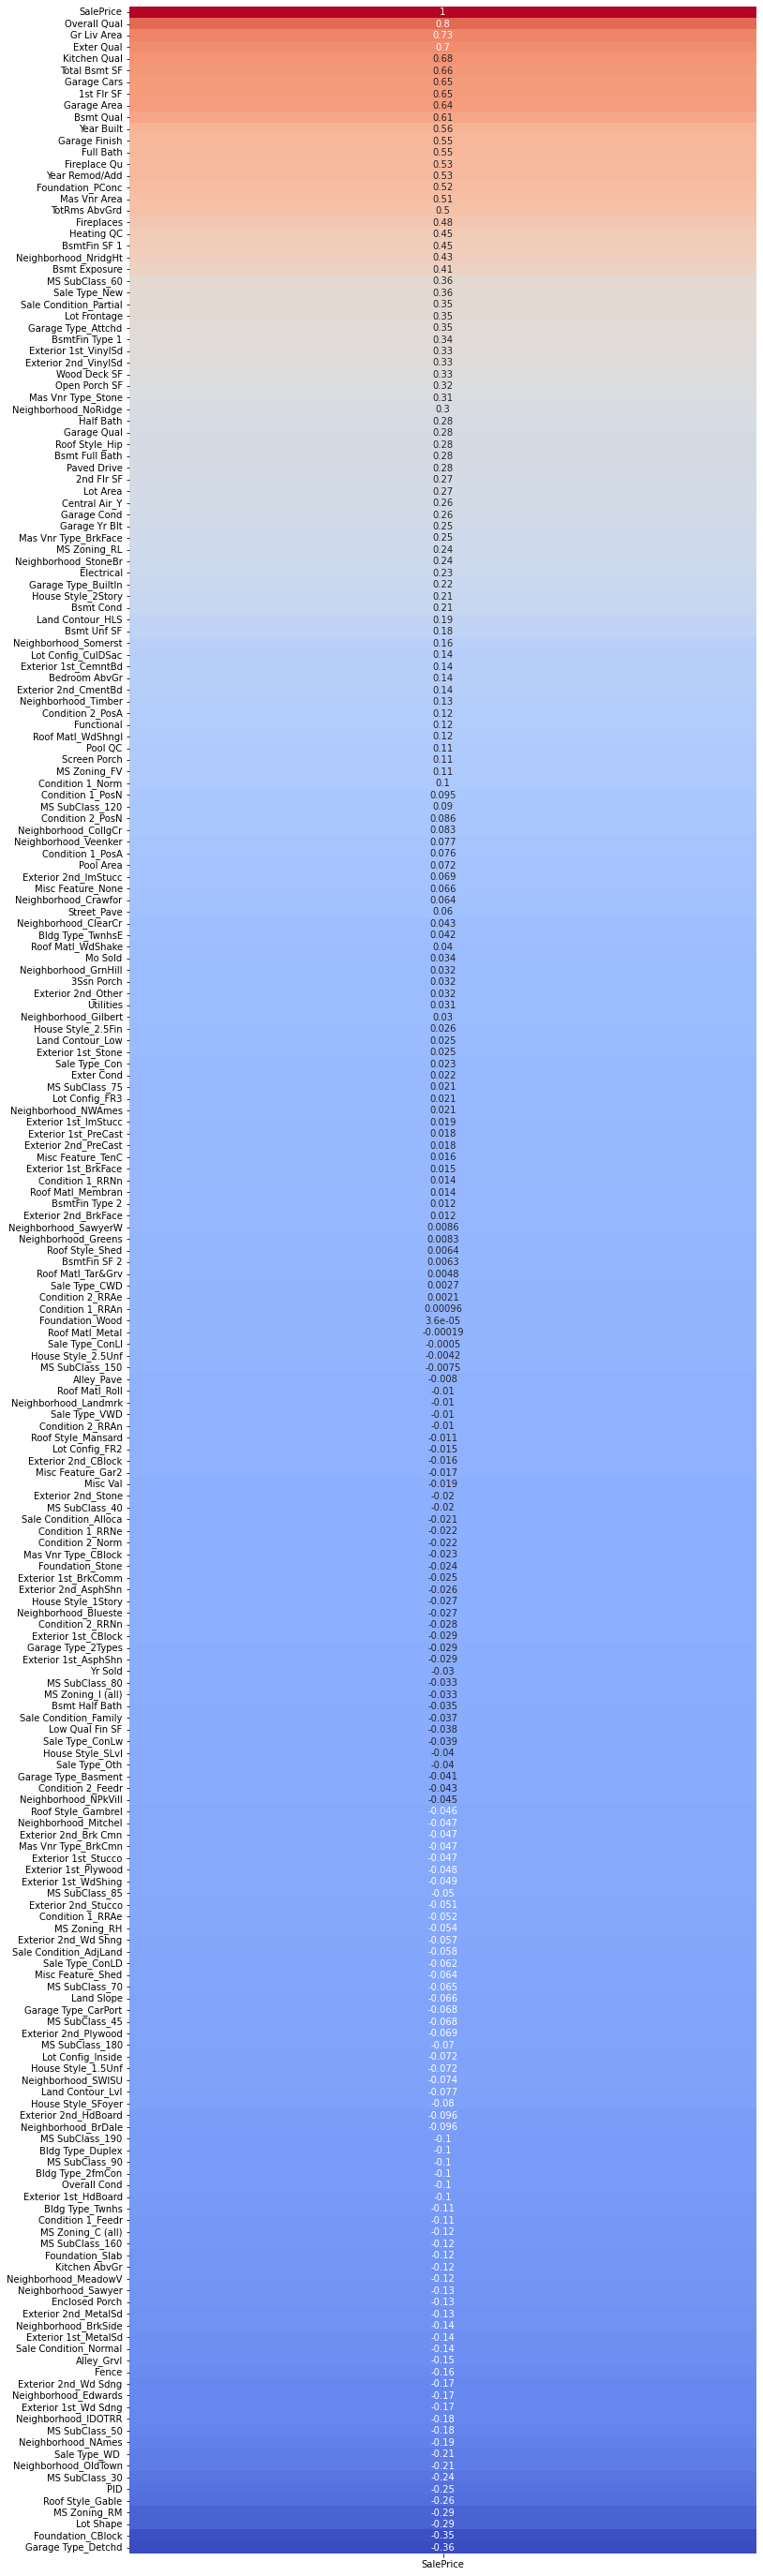

In [34]:
# This cell of coding forms a correlation heatmap for all variables correlated with 'SalePrice', the values are sorted in descending order 
# A figure size of 12 inches by 50 inches is formed.
# In the seaborn heatmap function annot is set to True, and the colour bar visibility is turned off.

x=df.corr()[['SalePrice']].sort_values(by='SalePrice', ascending=False)

plt.figure(figsize=(12,50))
sns.heatmap(x, cmap='coolwarm', annot=True, cbar=False)

#Conclusions

The five variables which are most correlated with 'SalePrice' include:

*   'Overall Qual'
*   'Gr Liv Area'
*   'Exter Qual'
*   'Kitchen Qual'
*   'Total Bsmt SF'

Variables that are related to the quality of parts of the house,and amount of living area look to have the strongest association with 'SalePrice'. The next stage in the project would be to perform standardising of data,feature engineering, and then finally build a regression model. So, far one has a good idea of what variables will be instrumental in building a good regression model. 







#Reference



*   https://towardsdatascience.com/eveything-you-need-to-know-about-interpreting-correlations-2c485841c0b8
*   https://medium.com/@kevin.a.crystal/intermediate-data-cleaning-195e1af3ccf9
*   https://medium.com/geekculture/how-to-handle-categorical-variables-7c1ee198c55c
*   http://www.eamonfleming.com/projects/housing-regression.html
https://medium.com/@hjhuney/
*   https://medium.com/@hjhuney/quantitative-data-exploration-for-regression-in-python-ames-housing-part-1-25879dd4cc4a
*   https://www.kaggle.com/code/serigne/stacked-regressions-top-4-on-leaderboard/notebook










#Extra - Exploring a Model

In [35]:
features = [col for col in df._get_numeric_data().columns if col !='SalePrice']
features
X = df[features]
y = df['SalePrice']

In [36]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3)

In [37]:
from sklearn.linear_model import Ridge

ridge_reg = Ridge(alpha=1.0)
ridge_reg.fit(X_train, y_train)

/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_ridge.py:157: LinAlgWarning: Ill-conditioned matrix (rcond=9.40562e-21): result may not be accurate.
  return linalg.solve(A, Xy, sym_pos=True, overwrite_a=True).T


Ridge()

In [38]:
from sklearn.model_selection import cross_val_score

cross_val_score(ridge_reg, X_train, y_train, cv=5)

/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_ridge.py:157: LinAlgWarning: Ill-conditioned matrix (rcond=1.12311e-20): result may not be accurate.
  return linalg.solve(A, Xy, sym_pos=True, overwrite_a=True).T
/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_ridge.py:157: LinAlgWarning: Ill-conditioned matrix (rcond=1.11358e-20): result may not be accurate.
  return linalg.solve(A, Xy, sym_pos=True, overwrite_a=True).T
/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_ridge.py:157: LinAlgWarning: Ill-conditioned matrix (rcond=1.20661e-20): result may not be accurate.
  return linalg.solve(A, Xy, sym_pos=True, overwrite_a=True).T
/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_ridge.py:157: LinAlgWarning: Ill-conditioned matrix (rcond=1.19208e-20): result may not be accurate.
  return linalg.solve(A, Xy, sym_pos=True, overwrite_a=True).T
/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_ridge.py:157: LinAlgWarning: Ill-condit

array([0.92967063, 0.93048382, 0.89120668, 0.88856326, 0.91563247])